# Final Project: Part 3 Scratch

## Beer Consumption in Sao Paulo, Brazil

## Problem Statement:

Beer is the most consumed alcoholic beverahe in Brazil. Brazil is the third largest beer producer in the world. Brazil is also the third largest consumer of beer in the world, after China and the United States and just in front of Germany. 

Brazil entered a recession in 2014. The country started to recover in 2017, but corruption, the lack of public policies, and the economic crisis have led to an increase in poverty. However, beer sales may help to drive the economy. Therefore, the main goal of this exercise is to predict the consumption of beer in one of the country's most populous cities, Sao Paulo.

## Target Variable and Feature Columns:

Target Variable: liters of beer consumed

Feature columns: Average temperature, minimum temperature, maximum temperature, precipitation, weekend vs weekday

## Goal and Sucess Metrics:

The goal is to be able to predict the amount of beer consumption in Sao Paulo.

The success metric is limited to the ability to predict the amount of beer consumed in Sao Paulo and whether there is a trend in the data based on the feature columns.

## Risks and Limitations:

- There is no data for those under the drinking age (18).
- The data is primarilly focused on an area with a university, where the maximum age is around 28.
- The data is only based on one year (2015). The climate may have been more mild or more extreme than other years.

#### Source of the dataset: https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

plt.style.use('fivethirtyeight')

In [2]:
%matplotlib inline

#### Load the data

In [107]:
# Convert commas to decimals
beer_df = pd.read_csv('Consumo_cerveja.csv', decimal=',')

In [108]:
beer_df.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,1/1/15,27.30,23.9,32.5,0.0,0,25.461
1,1/2/15,27.02,24.5,33.5,0.0,0,28.972
2,1/3/15,24.82,22.4,29.9,0.0,1,30.814
3,1/4/15,23.98,21.5,28.6,1.2,1,29.799
4,1/5/15,23.82,21.0,28.3,0.0,0,28.9


In [109]:
# Translate column names to English
beer_df.columns = ['Date', 'Average Temperature (C)', 'Minimum Temperature (C)', 'Maximum Temperature (C)', 'Precipitation (mm)', 'Weekend', 'Beer Consumption (liters)']

In [110]:
# Look at new column names
beer_df.head()

,Date,Average Temperature (C),Minimum Temperature (C),Maximum Temperature (C),Precipitation (mm),Weekend,Beer Consumption (liters)
0,1/1/15,27.30,23.9,32.5,0.0,0,25.461
1,1/2/15,27.02,24.5,33.5,0.0,0,28.972
2,1/3/15,24.82,22.4,29.9,0.0,1,30.814
3,1/4/15,23.98,21.5,28.6,1.2,1,29.799
4,1/5/15,23.82,21.0,28.3,0.0,0,28.9


In [111]:
# Check the shape
beer_df.shape

(365, 7)

In [112]:
# Check for null values
beer_df.isna().sum()

Date                         0
Average Temperature (C)      0
Minimum Temperature (C)      0
Maximum Temperature (C)      0
Precipitation (mm)           0
Weekend                      0
Beer Consumption (liters)    0
dtype: int64

In [113]:
# Check the data types
beer_df.dtypes

Date                          object
Average Temperature (C)      float64
Minimum Temperature (C)      float64
Maximum Temperature (C)      float64
Precipitation (mm)           float64
Weekend                        int64
Beer Consumption (liters)     object
dtype: object

In [114]:
# Convert Beer Consumption data from object to float
beer_df.loc[:, 'Beer Consumption (liters)'] = pd.to_numeric(beer_df.loc[:, 'Beer Consumption (liters)'])
beer_df.dtypes

Date                          object
Average Temperature (C)      float64
Minimum Temperature (C)      float64
Maximum Temperature (C)      float64
Precipitation (mm)           float64
Weekend                        int64
Beer Consumption (liters)    float64
dtype: object

In [115]:
# Check columns
beer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
Date                         365 non-null object
Average Temperature (C)      365 non-null float64
Minimum Temperature (C)      365 non-null float64
Maximum Temperature (C)      365 non-null float64
Precipitation (mm)           365 non-null float64
Weekend                      365 non-null int64
Beer Consumption (liters)    365 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 20.0+ KB


In [116]:
# Look at statistics
beer_df.describe()

,Average Temperature (C),Minimum Temperature (C),Maximum Temperature (C),Precipitation (mm),Weekend,Beer Consumption (liters)
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,21.226356,17.461370,26.611507,5.196712,0.284932,25.401367
std,3.180108,2.826185,4.317366,12.417844,0.452001,4.399143
min,12.900000,10.600000,14.500000,0.000000,0.000000,14.343000
25%,19.020000,15.300000,23.800000,0.000000,0.000000,22.008000
50%,21.380000,17.900000,26.900000,0.000000,0.000000,24.867000
75%,23.280000,19.600000,29.400000,3.200000,1.000000,28.631000
max,28.860000,24.500000,36.500000,94.800000,1.000000,37.937000


In [117]:
# Add month as a feature column. Extract from the date

beer_df['Month'] = pd.DatetimeIndex(beer_df['Date']).month

### Model the data

In [118]:
# Make column names simpler
beer_df.columns = ['Date', 'Average_Temp', 'Min_Temp', 'Max_Temp', 'Precipitation', 'Weekend', 'Beer_Consumption', 'Month']

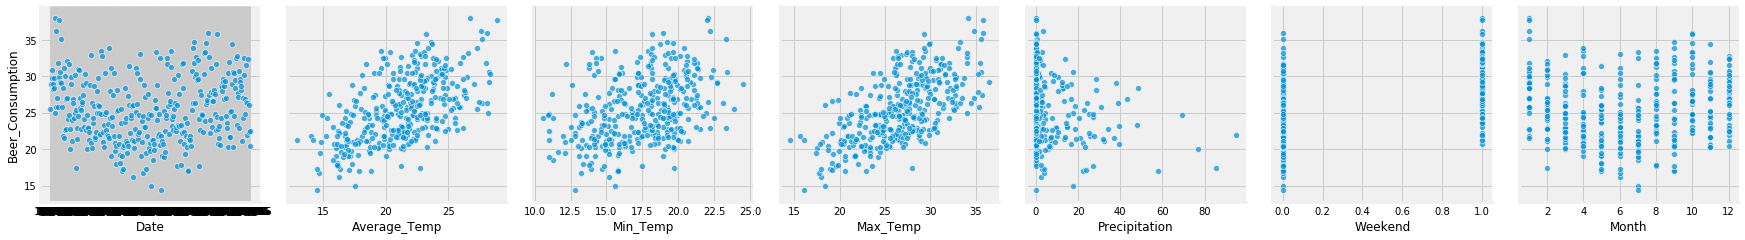

In [15]:
# Look at Beer Consumption against every other variable

g = sns.pairplot(data=beer_df,
                 x_vars=beer_df.drop('Beer_Consumption', axis='columns').columns,
                 y_vars=['Beer_Consumption'],
                 plot_kws={'alpha': .7},
                 height=3.5,
                )

In [81]:
# Separate into target column and potential feature columns
target_col = 'Beer_Consumption'
feature_cols = ['Average_Temp', 'Min_Temp', 'Max_Temp', 'Precipitation', 'Weekend', 'Month']

X = beer_df.loc[:, feature_cols]
y = beer_df.loc[:, target_col]

In [82]:
# Perform a train/test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [18]:
# Import a model class (regression because the target variable is a number)
from sklearn.linear_model import LinearRegression

In [19]:
# Create a model from that class
lr = LinearRegression()

In [20]:
# Fit the model
lr.fit(X_train, y_train)

# Find R-Squared value
print('R-squared value test set value:', lr.score(X_test, y_test))

# Find RMSE value
y_pred = lr.predict(X_test)
from sklearn import metrics
print('RMSE value:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# Find MAE value
print('MAE value:', metrics.mean_absolute_error(y_test, y_pred))

# Compare R-squared value to training set
print('R-squared training set value:', lr.score(X_train, y_train))

R-squared value test set value: 0.7258189501042467
RMSE value: 2.2737969930904356
MAE value: 1.8910666914697545
R-squared training set value: 0.7298793150812969


In [21]:
# Try a random forest model

from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=200)
rfr.fit(X_train, y_train)
print('R-squared training set value:', rfr.score(X_train, y_train))
print('R-squared value test set value:', rfr.score(X_test, y_test))

R-squared training set value: 0.949587490868008
R-squared value test set value: 0.7055485281734641


The training set R^2 value is better but the test set R^2 value is worse. The model is overfitting. 

In [22]:
# Try a decision tree model

from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
print('R-squared training set value:', dtr.score(X_train, y_train))
print('R-squared value test set value:', dtr.score(X_test, y_test))

R-squared training set value: 1.0
R-squared value test set value: 0.39866764384877684


The descision tree model is overfitting like the random forest model.

In [83]:
# Try a decision tree model with GridSearchCV

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, KFold

dtr = DecisionTreeRegressor()
kf = KFold(n_splits=5, shuffle=True)

grid = GridSearchCV(estimator=dtr,
                    param_grid={},
                    return_train_score=True,
                    cv=kf,
                    )
grid.fit(X, y)
grid.cv_results_['mean_train_score'][0], grid.cv_results_['mean_test_score'][0]

(1.0, 0.39111693152529414)

The model has an even higher problem with varaince here. 

In [84]:
# Change n_splits

dtr = DecisionTreeRegressor()
kf = KFold(n_splits=10, shuffle=True)

grid = GridSearchCV(estimator=dtr,
                    param_grid={},
                    return_train_score=True,
                    cv=kf,
                    )
grid.fit(X, y)
grid.cv_results_['mean_train_score'][0], grid.cv_results_['mean_test_score'][0]

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


(1.0, 0.33416570351828545)

This does not help.

In [86]:
# Try a random forest model with GridSearchCV

kf = KFold(5, shuffle=True, random_state=1)

grid = GridSearchCV(estimator=RandomForestRegressor(n_estimators=100, random_state=1),
                    param_grid={},
                    cv=kf,
                    return_train_score=True,
                   )
grid.fit(X, y)
grid.cv_results_['mean_train_score'][0], grid.cv_results_['mean_test_score'][0]

(0.9506203574852659, 0.6251058089192557)

This is not any better than a random forest model without GridSearchCV.

In [90]:
# Try a linear model with GridSearchCV

kf = KFold(5, shuffle=True, random_state=1)

grid = GridSearchCV(estimator=LinearRegression(),
                    param_grid={},
                    cv=kf,
                    return_train_score=True,
                   )
grid.fit(X, y)
grid.cv_results_['mean_train_score'][0], grid.cv_results_['mean_test_score'][0]

(0.7317184535102907, 0.7083476810954047)

This does not help.

In [26]:
# Try removing min and max temp (since they are correlated with average temp)

target_col = 'Beer_Consumption'
feature_cols = ['Average_Temp', 'Precipitation', 'Weekend', 'Month']

X = beer_df.loc[:, feature_cols]
y = beer_df.loc[:, target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [27]:
lr = LinearRegression()

lr.fit(X_train, y_train)

# Find R-Squared value
print('R-squared value test set value:', lr.score(X_test, y_test))

# Compare R-squared value to training set
print('R-squared training set value:', lr.score(X_train, y_train))

R-squared value test set value: 0.7040270391853551
R-squared training set value: 0.6597788210577638


In [28]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
print('R-squared training set value:', dtr.score(X_train, y_train))
print('R-squared value test set value:', dtr.score(X_test, y_test))

R-squared training set value: 0.9956391670746854
R-squared value test set value: 0.3301808679991116


In [29]:
rfr = RandomForestRegressor(n_estimators=200)
rfr.fit(X_train, y_train)
print('R-squared training set value:', rfr.score(X_train, y_train))
print('R-squared value test set value:', rfr.score(X_test, y_test))

R-squared training set value: 0.934719358094328
R-squared value test set value: 0.6088803051635323


This is not better than the model with more feature columns.

In [30]:
# Try with Polynomial Features

from sklearn.preprocessing import PolynomialFeatures
target_col = 'Beer_Consumption'
feature_cols = ['Average_Temp', 'Min_Temp', 'Max_Temp', 'Precipitation', 'Weekend', 'Month']

X = beer_df.loc[:, feature_cols]
y = beer_df.loc[:, target_col]

pf = PolynomialFeatures(degree=3, include_bias=False)
pf.fit(X)
X1 = pf.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X1, y)

lr1 = LinearRegression()
lr1.fit(X_train, y_train)

print(lr1.score(X_train, y_train))
print(lr1.score(X_test, y_test))


0.799125478188759
-0.04566149913195106


In [31]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
print('R-squared training set value:', dtr.score(X_train, y_train))
print('R-squared value test set value:', dtr.score(X_test, y_test))

R-squared training set value: 1.0
R-squared value test set value: 0.5838542758025601


In [32]:
rfr = RandomForestRegressor(n_estimators=200)
rfr.fit(X_train, y_train)
print('R-squared training set value:', rfr.score(X_train, y_train))
print('R-squared value test set value:', rfr.score(X_test, y_test))

R-squared training set value: 0.9494406225971593
R-squared value test set value: 0.7209212605031816


In [33]:
# Random forest regressor model looks to be the best model. Find the best number of estimators
from sklearn.metrics.scorer import make_scorer

def neg_rmse(y_true, y_pred):
    mse = np.square(y_true - y_pred).mean()
    return -np.sqrt(mse)

neg_rmse = make_scorer(neg_rmse)

target_col = 'Beer_Consumption'
feature_cols = ['Average_Temp', 'Min_Temp', 'Max_Temp', 'Precipitation', 'Weekend', 'Month']

X = beer_df.loc[:, feature_cols]
y = beer_df.loc[:, target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y)

n_estimators_range = range(10, 701, 50)

kf = KFold(5, shuffle=True, random_state=1)
grid = GridSearchCV(estimator=RandomForestRegressor(random_state=1),
                    param_grid={'n_estimators': n_estimators_range},
                    cv=kf,
                    scoring=neg_rmse,
                    return_train_score=True,
                   )
grid.fit(X, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
       error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': range(10, 701, 50)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=make_scorer(neg_rmse), verbose=0)

In [34]:
rmse_df = -pd.DataFrame(grid.cv_results_).loc[:, [f'split{i}_test_score' for i in range(5)]]
scores = rmse_df.sum(axis='columns')
scores.index = n_estimators_range
scores

10     13.513114
60     13.249559
110    13.115831
160    13.010960
210    12.954157
260    12.952608
310    12.941760
360    12.952448
410    12.944843
460    12.948367
510    12.955601
560    12.953896
610    12.946892
660    12.946018
dtype: float64

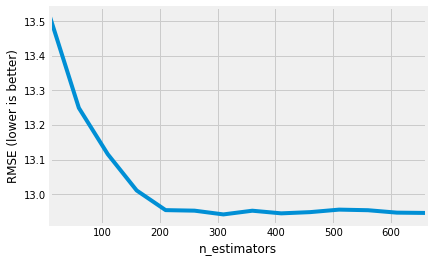

In [35]:
# Plot RMSE vs n_estimators 

ax = scores.plot()
ax.set_xlabel('n_estimators')
ax.set_ylabel('RMSE (lower is better)');

In [36]:
# Use n_estimators = 310

rfr = RandomForestRegressor(n_estimators=310)
rfr.fit(X_train, y_train)
print('R-squared training set value:', rfr.score(X_train, y_train))
print('R-squared value test set value:', rfr.score(X_test, y_test))

R-squared training set value: 0.9497738623945822
R-squared value test set value: 0.7178794862395514


Optimizing n_estimators did not significantly change the score.

In [37]:
# Try with an interaction term

target_col = 'Beer_Consumption'
feature_cols = ['Average_Temp', 'Min_Temp', 'Max_Temp', 'Precipitation', 'Weekend', 'Month']

X = beer_df.loc[:, feature_cols]
y = beer_df.loc[:, target_col]

kf = KFold(n_splits=5, shuffle=True)

rfr_grid = GridSearchCV(RandomForestRegressor(n_estimators=310), param_grid={}, cv=kf, return_train_score=True)
rfr_grid.fit(X, y)
print('R-squared training set value:', rfr_grid.cv_results_['mean_train_score'][0])
print('R-squared value test set value:', rfr_grid.cv_results_['mean_test_score'][0])

R-squared training set value: 0.95231569640784
R-squared value test set value: 0.6526314081783183


In [38]:
X = beer_df.loc[:, feature_cols]
X.loc[:, 'Interaction'] = X.loc[:, 'Average_Temp'] * X.loc[:, 'Month']

rfr_grid = GridSearchCV(RandomForestRegressor(n_estimators=310), param_grid={}, cv=kf, return_train_score=True)
rfr_grid.fit(X, y)
print('R-squared training set value:', rfr_grid.cv_results_['mean_train_score'][0])
print('R-squared value test set value:', rfr_grid.cv_results_['mean_test_score'][0])

R-squared training set value: 0.9525793469054769
R-squared value test set value: 0.6519229498968853


This did not help the random forest regressor score.

In [39]:
# Try interaction term with linear regression

X = beer_df.loc[:, feature_cols]
X.loc[:, 'Interaction'] = X.loc[:, 'Average_Temp'] * X.loc[:, 'Month']

lr_grid = GridSearchCV(LinearRegression(), param_grid={}, cv=kf, return_train_score=True)
lr_grid.fit(X, y)
print('R-squared training set value:', lr_grid.cv_results_['mean_train_score'][0])
print('R-squared value test set value:', lr_grid.cv_results_['mean_test_score'][0])

R-squared training set value: 0.7328649405748786
R-squared value test set value: 0.7138610917983159


In [119]:
# Add season as a feature column
# Assume every 3 months is a new season 
# Seasons are opposite to what they are in North America (Brazil is in the Southern hemisphere)
    
beer_df.loc[(beer_df.Month == 12) | (beer_df.Month == 1) | (beer_df.Month == 2), 'Season'] = 'Summer'
beer_df.loc[(beer_df.Month == 3) | (beer_df.Month == 4) | (beer_df.Month == 5), 'Season'] = 'Fall'
beer_df.loc[(beer_df.Month == 6) | (beer_df.Month == 7) | (beer_df.Month == 8), 'Season'] = 'Winter'
beer_df.loc[(beer_df.Month == 9) | (beer_df.Month == 10) | (beer_df.Month == 11), 'Season'] = 'Spring'

In [120]:
beer_df.head()

,Date,Average_Temp,Min_Temp,Max_Temp,Precipitation,Weekend,Beer_Consumption,Month,Season
0,1/1/15,27.30,23.9,32.5,0.0,0,25.461,1,Summer
1,1/2/15,27.02,24.5,33.5,0.0,0,28.972,1,Summer
2,1/3/15,24.82,22.4,29.9,0.0,1,30.814,1,Summer
3,1/4/15,23.98,21.5,28.6,1.2,1,29.799,1,Summer
4,1/5/15,23.82,21.0,28.3,0.0,0,28.900,1,Summer


In [121]:
# Encode categorical variables as integers.
beer_df = pd.get_dummies(beer_df, columns=['Season'], drop_first=True)

In [123]:
beer_df.head()

,Date,Average_Temp,Min_Temp,Max_Temp,Precipitation,Weekend,Beer_Consumption,Month,Season_Spring,Season_Summer,Season_Winter
0,1/1/15,27.30,23.9,32.5,0.0,0,25.461,1,0,1,0
1,1/2/15,27.02,24.5,33.5,0.0,0,28.972,1,0,1,0
2,1/3/15,24.82,22.4,29.9,0.0,1,30.814,1,0,1,0
3,1/4/15,23.98,21.5,28.6,1.2,1,29.799,1,0,1,0
4,1/5/15,23.82,21.0,28.3,0.0,0,28.900,1,0,1,0


In [122]:
# Try training with new feature columns
target_col = 'Beer_Consumption'
feature_cols = ['Average_Temp', 'Min_Temp', 'Max_Temp', 'Precipitation', 'Weekend', 'Month', 'Season_Spring', 'Season_Summer', 'Season_Winter']

X = beer_df.loc[:, feature_cols]
y = beer_df.loc[:, target_col]

In [43]:
# Run train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [44]:
lr = LinearRegression()

lr.fit(X_train, y_train)

# Find R-Squared value
print('R-squared value test set value:', lr.score(X_test, y_test))

# Compare R-squared value to training set
print('R-squared training set value:', lr.score(X_train, y_train))

R-squared value test set value: 0.7244840999499342
R-squared training set value: 0.7309446756516356


In [45]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
print('R-squared training set value:', dtr.score(X_train, y_train))
print('R-squared value test set value:', dtr.score(X_test, y_test))

R-squared training set value: 1.0
R-squared value test set value: 0.4972765848220117


In [46]:
rfr = RandomForestRegressor(n_estimators=310)
rfr.fit(X_train, y_train)
print('R-squared training set value:', rfr.score(X_train, y_train))
print('R-squared value test set value:', rfr.score(X_test, y_test))

R-squared training set value: 0.9495067642328079
R-squared value test set value: 0.700055882706168


Introducing season as a feature column has decreased variance.

In [47]:
# See with interaction term

# Try interaction term with linear regression

X = beer_df.loc[:, feature_cols]
X.loc[:, 'Interaction'] = X.loc[:, 'Max_Temp'] * X.loc[:, 'Season_Summer']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
lr = LinearRegression()
lr.fit(X, y)

# Find R-Squared value
print('R-squared value test set value:', lr.score(X_test, y_test))

# Compare R-squared value to training set
print('R-squared training set value:', lr.score(X_train, y_train))

R-squared value test set value: 0.7395385462015329
R-squared training set value: 0.7290884224987844


In [48]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
print('R-squared training set value:', dtr.score(X_train, y_train))
print('R-squared value test set value:', dtr.score(X_test, y_test))

R-squared training set value: 1.0
R-squared value test set value: 0.4820759106231798


In [49]:
rfr = RandomForestRegressor(n_estimators=310)
rfr.fit(X_train, y_train)
print('R-squared training set value:', rfr.score(X_train, y_train))
print('R-squared value test set value:', rfr.score(X_test, y_test))

R-squared training set value: 0.9504355031323304
R-squared value test set value: 0.6965642030985018


Adding an interaction term does not better the score.

In [72]:
# Try removing some of the feature columns again

target_col = 'Beer_Consumption'
X = beer_df.drop(['Date', 'Beer_Consumption', 'Month'], axis='columns')
y = beer_df.loc[:, target_col]

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1)

In [73]:
lr = LinearRegression()
lr.fit(X, y)

# Find R-Squared value
print('R-squared value test set value:', lr.score(X_test, y_test))

# Compare R-squared value to training set
print('R-squared training set value:', lr.score(X_train, y_train))

R-squared value test set value: 0.7353378722309503
R-squared training set value: 0.7257400622341764


In [80]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
print('R-squared training set value:', dtr.score(X_train, y_train))
print('R-squared value test set value:', dtr.score(X_test, y_test))

R-squared training set value: 1.0
R-squared value test set value: 0.5124822970150619


In [71]:
rfr = RandomForestRegressor(n_estimators=310)
rfr.fit(X_train, y_train)
print('R-squared training set value:', rfr.score(X_train, y_train))
print('R-squared value test set value:', rfr.score(X_test, y_test))

R-squared training set value: 0.9514777881245674
R-squared value test set value: 0.6232257863092052


Removing month decreses variance in the decision tree model.

In [124]:
# Try removing some of the feature columns again

target_col = 'Beer_Consumption'
X = beer_df.drop(['Date', 'Beer_Consumption', 'Month', 'Min_Temp', 'Season_Spring'], axis='columns')
y = beer_df.loc[:, target_col]

X_train, X_test, y_train, y_test = train_test_split(X,y)

In [125]:
lr = LinearRegression()
lr.fit(X, y)

# Find R-Squared value
print('R-squared value test set value:', lr.score(X_test, y_test))

# Compare R-squared value to training set
print('R-squared training set value:', lr.score(X_train, y_train))

R-squared value test set value: 0.7073586450158958
R-squared training set value: 0.7264968603224091


In [126]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
print('R-squared training set value:', dtr.score(X_train, y_train))
print('R-squared value test set value:', dtr.score(X_test, y_test))

R-squared training set value: 1.0
R-squared value test set value: 0.359875935936363


In [127]:
rfr = RandomForestRegressor(n_estimators=310)
rfr.fit(X_train, y_train)
print('R-squared training set value:', rfr.score(X_train, y_train))
print('R-squared value test set value:', rfr.score(X_test, y_test))

R-squared training set value: 0.9538990524241726
R-squared value test set value: 0.6099853928405279


This did not better the score or decrease bias or variance.